In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt

In [2]:
!pip install --upgrade pandas_datareader

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3.150000e+03
mean,58.860577,60.176703,57.402961,58.807496,58.807496,9.359654e+07
std,95.658595,97.854579,93.175266,95.526397,95.526397,8.169856e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.976167,9.117500,8.765667,8.957666,8.957666,4.234658e+07
50%,16.229000,16.491000,15.945000,16.222334,16.222334,7.596600e+07
75%,24.622500,25.086666,24.158668,24.448000,24.448000,1.172978e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [6]:
df = data.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
df = df.drop(['Date','Adj Close'] , axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


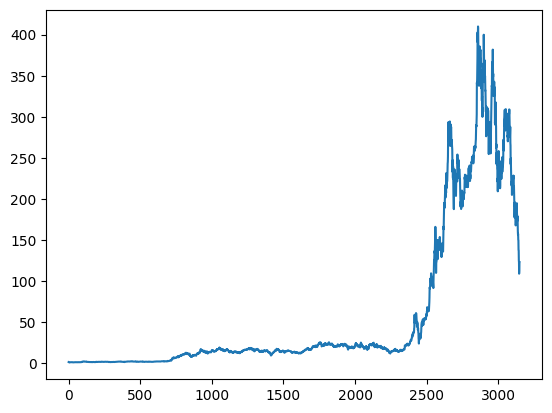

In [8]:
plt.plot(df.Close)

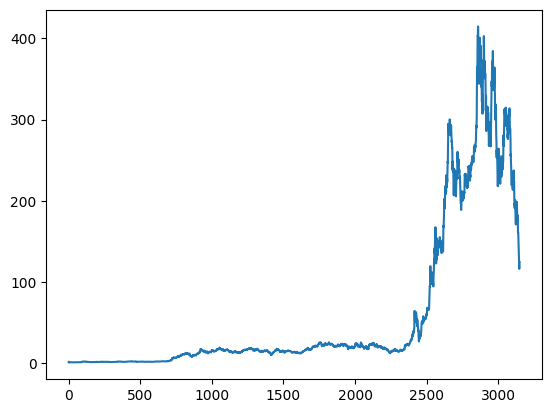

In [9]:
plt.plot(df.High)

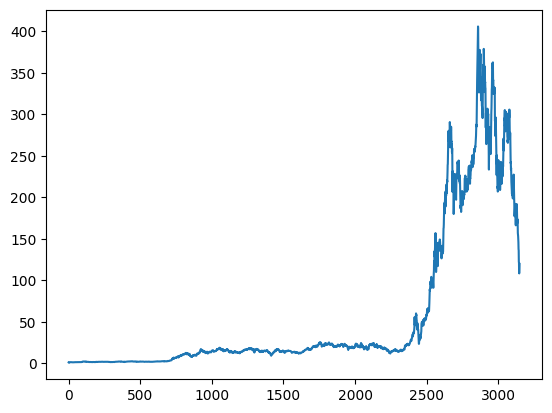

In [10]:
plt.plot(df.Low)

In [11]:
moving_average = df.Close.rolling(100).mean()
moving_average

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    234.019467
3146    232.024134
3147    230.269534
3148    228.583501
3149    226.981967
Name: Close, Length: 3150, dtype: float64

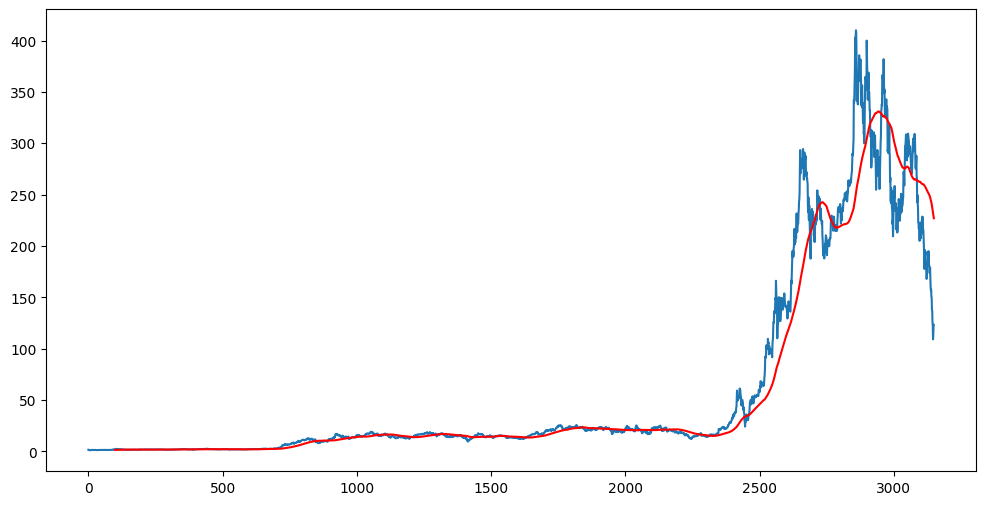

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moving_average,color='red')
plt.show()

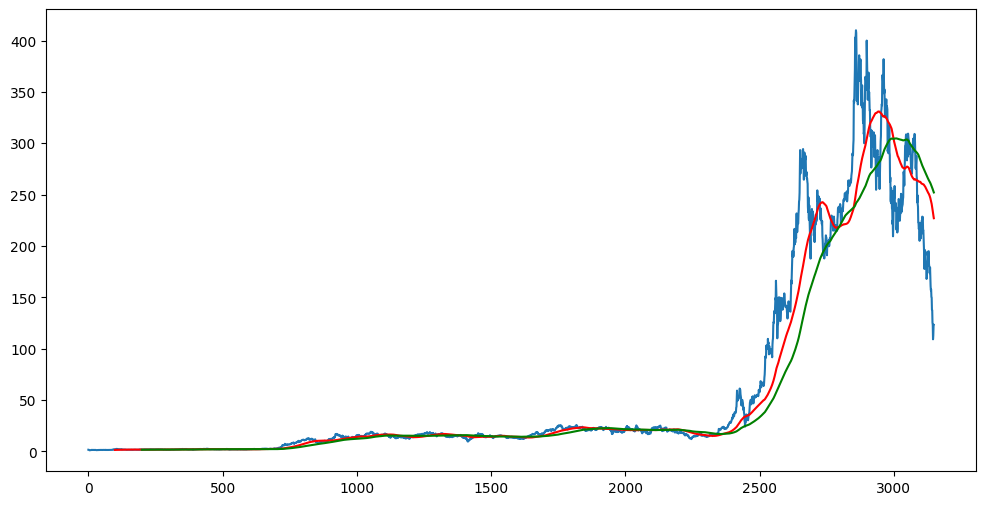

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moving_average,color='red')
plt.plot(df.Close.rolling(200).mean(),color='green')
plt.show()

In [15]:
df.shape

(3150, 5)

In [17]:
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [18]:
train_data.shape

(2205, 1)

In [19]:
test_data.shape

(945, 1)

In [20]:
train_data.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [21]:
test_data.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


In [23]:
train_data_array = scaler.fit_transform(train_data)
train_data_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.71522207],
       [0.74046587],
       [0.73152757]])

In [24]:
X_train = []
y_train = []


for i in range(100, train_data_array.shape[0]):
    X_train.append(train_data_array[i-100:i])
    y_train.append(train_data_array[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [25]:
X_train

array([[[2.19122659e-02],
        [2.17497545e-02],
        [1.66847339e-02],
        ...,
        [4.06283831e-02],
        [3.75677252e-02],
        [3.70801812e-02]],

       [[2.17497545e-02],
        [1.66847339e-02],
        [9.20911077e-03],
        ...,
        [3.75677252e-02],
        [3.70801812e-02],
        [3.81636182e-02]],

       [[1.66847339e-02],
        [9.20911077e-03],
        [8.39665043e-04],
        ...,
        [3.70801812e-02],
        [3.81636182e-02],
        [4.11430204e-02]],

       ...,

       [[8.89707417e-01],
        [8.95476656e-01],
        [8.81906791e-01],
        ...,
        [6.82475603e-01],
        [7.01598038e-01],
        [7.11863468e-01]],

       [[8.95476656e-01],
        [8.81906791e-01],
        [8.80985870e-01],
        ...,
        [7.01598038e-01],
        [7.11863468e-01],
        [7.15222070e-01]],

       [[8.81906791e-01],
        [8.80985870e-01],
        [9.00216639e-01],
        ...,
        [7.11863468e-01],
        [7.1522

In [27]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units=100,activation='relu',return_sequences= True , input_shape= (X_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,activation='relu',return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           30200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
from keras.callbacks import ModelCheckpoint
# This will save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[checkpoint])


Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.0396
Epoch 1: val_loss improved from inf to 0.00825, saving model to best_model.h5
53/53 [==============================] - 49s 723ms/step - loss: 0.0396 - val_loss: 0.0083
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - ETA: 0s - loss: 0.0081
Epoch 2: val_loss improved from 0.00825 to 0.00498, saving model to best_model.h5
53/53 [==============================] - 39s 742ms/step - loss: 0.0081 - val_loss: 0.0050
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.0071
Epoch 3: val_loss did not improve from 0.00498
53/53 [==============================] - 37s 705ms/step - loss: 0.0071 - val_loss: 0.0214
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.0077
Epoch 4: val_loss did not improve from 0.00498
53/53 [==============================] - 38s 715ms/step - loss: 0.0077 - val_loss: 0.0210
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.0074
Epoch 5: val_loss improved from 0.00498 to 0.00446, saving model to best_model.h5
53/53 [==============================] - 38s 721ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0066
Epoch 6: val_loss 

In [31]:
test_data.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [32]:
past_100_days = train_data.tail(100)

In [33]:
final_df = past_100_days.append(test_data,ignore_index=True)
final_df.head()

<ipython-input-33-076f1c1b4acf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_data,ignore_index=True)


,Close
0,22.737333
1,23.210667
2,23.426666
3,23.367332
4,22.085333


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02714812],
       [0.02833728],
       [0.02887994],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

In [35]:
input_data.shape

(1045, 1)

In [36]:
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

X_test , y_test = np.array(X_test) , np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [37]:
from keras.models import load_model
loaded_model = load_model('/content/best_model.h5')


In [38]:
# Make prediction using the trained model
y_predicted =loaded_model(X_test)


In [39]:
y_predicted.shape

TensorShape([945, 1])

In [40]:
y_test

array([0.01889934, 0.0148746 , 0.01607717, 0.01578239, 0.01563332,
       0.0162614 , 0.0149818 , 0.0148612 , 0.01464012, 0.01580919,
       0.01545244, 0.01579244, 0.01403214, 0.01422475, 0.01334711,
       0.01149972, 0.0094078 , 0.010468  , 0.01000238, 0.00921854,
       0.01090849, 0.01273913, 0.01279105, 0.01140425, 0.01103243,
       0.01055342, 0.0101414 , 0.00804612, 0.00893381, 0.00887351,
       0.00826721, 0.00536967, 0.00442001, 0.00437311, 0.00230464,
       0.0027669 , 0.00195291, 0.00162966, 0.00182395, 0.00154927,
       0.00103675, 0.        , 0.00245035, 0.00295114, 0.00451882,
       0.00427597, 0.00567952, 0.00638632, 0.00507321, 0.00585203,
       0.00602119, 0.00771449, 0.00766592, 0.00794898, 0.00680838,
       0.00718356, 0.00748169, 0.00683184, 0.00674976, 0.0073477 ,
       0.00745154, 0.00807292, 0.0076341 , 0.0093676 , 0.00906612,
       0.00860386, 0.00855696, 0.0100409 , 0.00998731, 0.01107263,
       0.01248288, 0.01229529, 0.01271066, 0.01248957, 0.01326

In [41]:
scaler.scale_

array([0.00251232])

In [43]:
scale_factor = 1/0.00251232
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

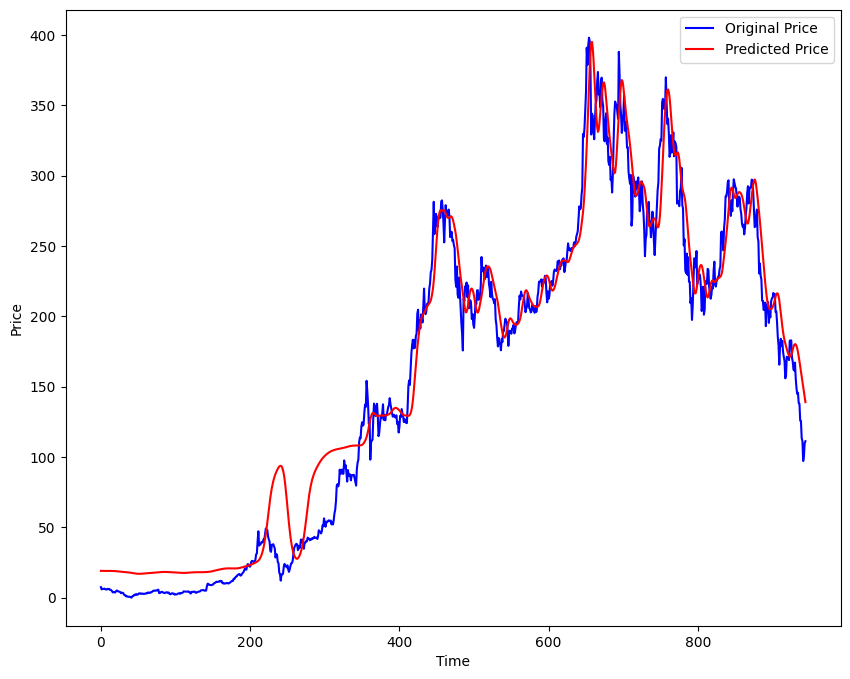

In [44]:
plt.figure(figsize=(10,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()